# Fetal Health Prediction Model

The purpose of this model is to classify fetuses into 3 different health classes based on a series of features from cardiotocography (CTG) scans. These classes are: 1 - normal, 2 - suspect, and 3 - pathological.

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
#Read in the data
df1 = pd.read_csv('fetal_health.csv')

#Display dataframe stats
df1.describe()

,Baseline Value,Accelerations,Fetal Movement,Uterine Contractions,Light Decelerations,Severe Decelerations,Prolonged Decelerations,Abnormal Short Term Variability,Mean Value of Short Term Variability,Percentage of Time with Abnormal Long Term Variability,...,Histogram Min,Histogram Max,Histogram Number of Peaks,Histogram Number of Zeros,Histogram Mode,Histogram Mean,Histogram Median,Histogram Variance,Histogram Tendency,Fetal Health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.828786,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.383108,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


After reading in the data, it's a relief to see that there are no null entries. It looks like I can go ahead and fit the first model.

## Fitting the first model

The first model uses scikit's logistic regression function.

In [ ]:
#Fit logistic regression model
X = df1.drop('Fetal Health', axis = 1)
y = df1['Fetal Health']

#80% train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#Fit model and make predictions
model1 = LogisticRegression(max_iter=int(1e5)).fit(X_train, y_train)
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

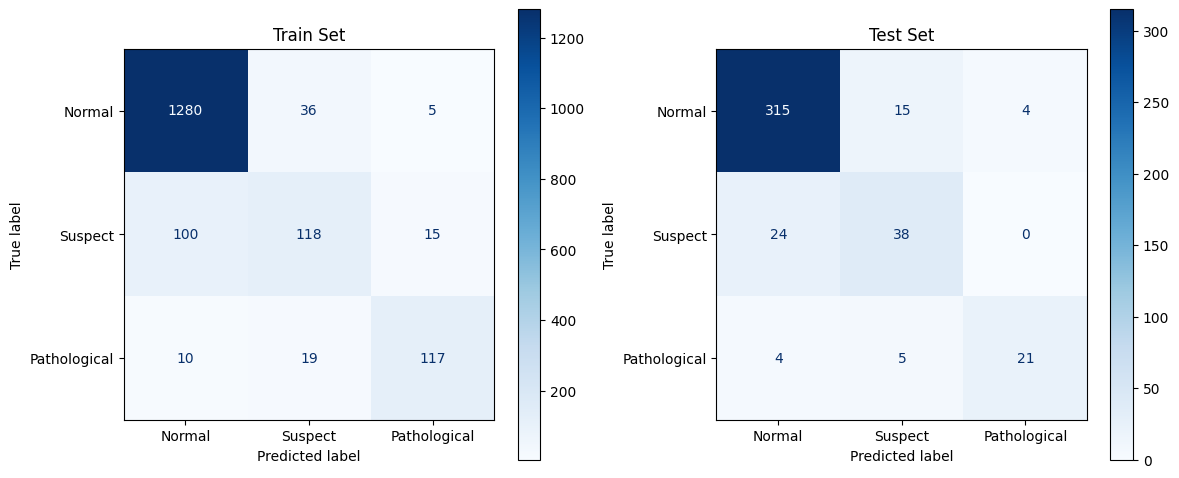

In [ ]:
#Function to print 3x3 confusion matrices given a model

def PrintConfusionMatrix(model):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

    # Updated: new version of sklearn
    # Training set
    ConfusionMatrixDisplay.from_estimator(model, X_train, y_train,
                                 display_labels=['Normal', 'Suspect', 'Pathological'],
                                 cmap=plt.cm.Blues,
                                 ax=ax1)
    ax1.set_title('Train Set');

    # Test set
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,
                                 display_labels=['Normal', 'Suspect', 'Pathological'],
                                 cmap=plt.cm.Blues,
                                 ax=ax2)
    ax2.set_title('Test Set')

    """
    Outdated version of sklearn

    plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=['Normal', 'Suspect', 'Pathological'],
                                 cmap=plt.cm.Blues,
                                 ax=ax1)
    ax1.set_title('Train Set');

    plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['Normal', 'Suspect', 'Pathological'],
                                 cmap=plt.cm.Blues,
                                 ax=ax2)
    ax2.set_title('Test Set')
    """

    return plt.tight_layout()

# Call the function and print the confusion matrices for the first model
PrintConfusionMatrix(model1)

At first glance, it's a good sign that most of the results are focused in the diagonal, representing the times the model's prediction was correct. However, the model has the most trouble with the "suspect" category: it predicts "normal" for the "suspect" fetuses quite often. This raises concerns, as it is crucial for both mothers and physicians to be informed when fetal health is declining or when there are potential reasons for concern. Overall, it performs pretty well, but could definitely use a bit of work.

I'll now calculate the accuracy score for this initial model and use the score for the test set as my baseline.

### Accuracy of Model 1 & Baseline

In [ ]:
print('Training Accuracy/Training Baseline: ', accuracy_score(y_train_pred, y_train))
print('Testing Accuracy/Testing Baseline: ', accuracy_score(y_test_pred, y_test))

Training Accuracy/Training Baseline:  0.8911764705882353
Testing Accuracy/Testing Baseline:  0.8779342723004695


To measure the performance of my models, I would also like to use prescision, recall and F1 scores. These are a little more complicated for multiclass classification problems, since there aren't necessarily set "positive" and "negative" values for TP, TN, FP and FN determination.

I found a really helpful article that explains how to calculate these values for multiclass classification problems, as well as the difference between micro, macro and weighted precision, recall, and F1 scores. The article talked about determining TP, TN, FP and FN for each individual class, which makes a lot of sense. It is number 3 in the list of sources.

Precision, recall and F1 scores can be calculated for each class, and then macro and weighted scores can be calculated from these values. For example, taking a look at the "Normal" class for the training set results, true positives ≈ 1278, true negatives ≈ 121+14+20+116 = 271, false positives ≈ 98+10 = 108, and false negatives ≈ 38+5 = 43. *Note that these values are approximate, because confusion matrices may differ slightly each time the model makes predictions.* Thus, precision = TP/(TP+FP) ≈ 0.922, recall = TP/(TP+FN) ≈ 0.967, and F1-score = 0.945 (the average of precision and recall).

Next, we can calculate the micro, macro and weighted averages of these values in different ways. Macro scores take the average of the scores for the three classes (so for example, the macro average of precision would be the average of the precision scores for all three classes), and the weighted scores take the weighted averages of each measure. This means that if there were 90 'normal' fetuses, 20 'suspect,' and 12 'pathological', for example, with precision scores of 0.90, 0.89, and 0.88 respectively, the weighted average score would be (0.90 * 90) + (0.89 * 20) + (0.88 * 12) / (90+20+12).

Luckily, scikit's *classification_report* function does all of this for us. This will be extremely useful for measuring performance. According to the documentation, the "support" column is "the number of occurences of each class in y_true."

In [ ]:
# Print classification reports
print("Training Classification Report: \n\n", classification_report(y_train, y_train_pred, target_names=['Normal', 'Suspect', 'Pathological']))
print("Testing Classification Report: \n\n", classification_report(y_test, y_test_pred, target_names=['Normal', 'Suspect', 'Pathological']))

Training Classification Report: 

               precision    recall  f1-score   support

      Normal       0.92      0.97      0.94      1321
     Suspect       0.68      0.51      0.58       233
Pathological       0.85      0.80      0.83       146

    accuracy                           0.89      1700
   macro avg       0.82      0.76      0.78      1700
weighted avg       0.88      0.89      0.88      1700

Testing Classification Report: 

               precision    recall  f1-score   support

      Normal       0.92      0.94      0.93       334
     Suspect       0.66      0.61      0.63        62
Pathological       0.84      0.70      0.76        30

    accuracy                           0.88       426
   macro avg       0.80      0.75      0.78       426
weighted avg       0.87      0.88      0.88       426



In summary, these are my baseline scores:

### Performance baselines and goals

| Performance Measure | Baseline | Goal |
|---|-------------|-----------|
| Accuracy | 0.88  | ≥ 0.95 |
| Macro F1-Score | 0.78 | ≥ 0.85 |
| Weighted F1-Score | 0.88 | ≥ 0.95 |

The scores above are specifically for the test set, since test set results reflect how the model performs with unseen data. Furthermore, I prioritized F1-scores over the individual precision and recall scores, since the F1-score is an average of precision and recall, and thus the value essentially reflects both of them and better communicates the overall performance of the model.

When I begin to fit more models, I believe I will have a better feel of how attainable these goals are, and may adjust them accordingly.

## Exploration
My current plan for tackling this project is as follows:
1. Fit the first model using logistic regression function (done)
2. Experiment with the parameters of the logisitic regression function
3. **NEW:** Fit a Nearest Neighbors model and experiment with different *k*'s
4. Fit an SVC and experiment with the parameters of the classifier
5. Fit a neural network and experiment with the parameters of the classifier
6. **NEW:** Fit a decision tree classifier and experiment with parameters
7. Take a look at some individual variables and/or groups of variables


## Tweaking the logistic regression model
When learning how to use this function, the parameters I found usually made the most difference when adjusted were **max_iter**, **class_weight**, and **C** (regularization strength). I will adjust the latter two, since the first has already been adjusted.

### Model 2: Balancing Class Weights

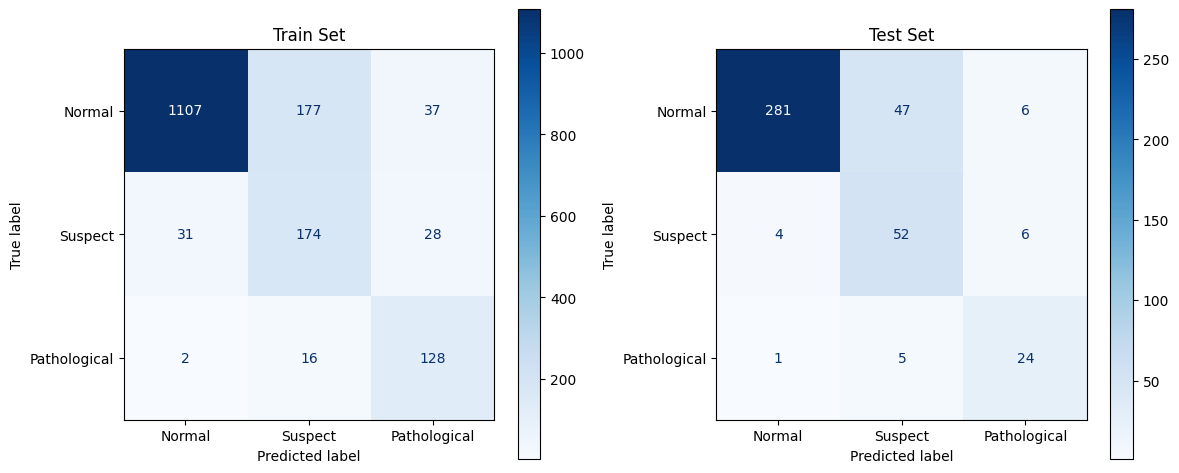

In [ ]:
model2 = LogisticRegression(max_iter=int(1e5), class_weight='balanced').fit(X_train, y_train)
PrintConfusionMatrix(model2)

In [ ]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

# Function to print accuracy, macro F1-score and weighted F1-score
def report(y_true, y_pred, label):


    print("{} | Accuracy: {:.7f} | Macro F1-Score: {:.7f} | Weighted F1-Score: {:.7f} ".format(
    label.ljust(10),
    accuracy_score(y_true, y_pred),
    f1_score(y_true, y_pred, average='macro'),
    f1_score(y_true, y_pred, average='weighted')
    ))

report(y_train, y_train_pred, 'Train Set')
report(y_test, y_test_pred, 'Test Set')

Train Set  | Accuracy: 0.8288235 | Macro F1-Score: 0.7449322 | Weighted F1-Score: 0.8434180 
Test Set   | Accuracy: 0.8380282 | Macro F1-Score: 0.7534101 | Weighted F1-Score: 0.8530901 


It seems like something a little odd happened here. For normal fetuses, the number of correct predictions decreased, but the number of correct predictions for suspect and pathological fetuses increased. It also predicted "suspect" for a lot of "normal" fetuses; the opposite of what we saw in the first model, which is really interesting.

Overall, the model didn't perform as well, so it seems that classes don't need to be balanced for this particular problem. I won't be balancing class weights for the rest of the models.

### Models 3 & 4: Increasing & Decreasing Regularization Strength Respectively

The **C** parameter is the inverse of regularization strength, and its default value is 1.0. I will adjust this value 100 fold for both models.

Train Set  | Accuracy: 0.8894118 | Macro F1-Score: 0.7768863 | Weighted F1-Score: 0.8824076 
Test Set   | Accuracy: 0.8708920 | Macro F1-Score: 0.7599730 | Weighted F1-Score: 0.8670304 


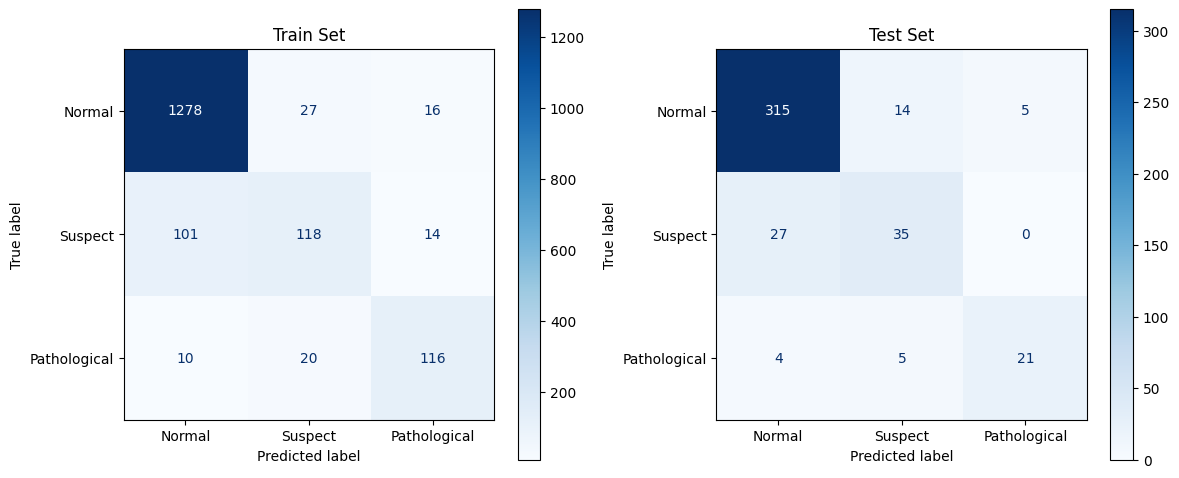

In [ ]:
#Function to perform train-test split, fit model and print performance
def fit_pred_report(model):

    X = df1.drop("Fetal Health", axis = 1)
    y = df1['Fetal Health']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    report(y_train, y_train_pred, 'Train Set')
    report(y_test, y_test_pred, 'Test Set')

model3 = LogisticRegression(max_iter=int(1e5), C=0.01).fit(X_train, y_train)
PrintConfusionMatrix(model3)
fit_pred_report(model3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Set  | Accuracy: 0.8923529 | Macro F1-Score: 0.7872862 | Weighted F1-Score: 0.8863664 
Test Set   | Accuracy: 0.8779343 | Macro F1-Score: 0.7679512 | Weighted F1-Score: 0.8757214 


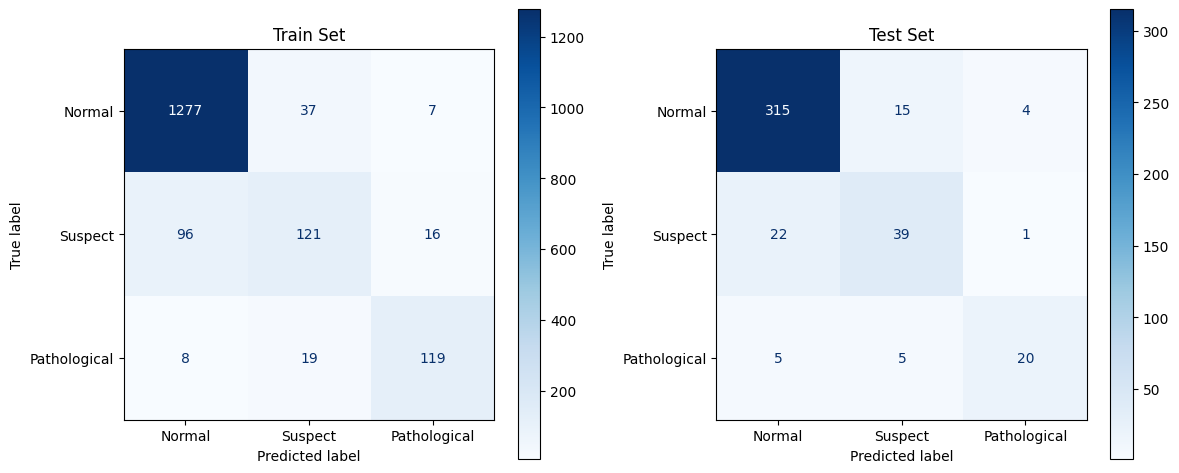

In [ ]:
model4 = LogisticRegression(max_iter=int(1e5), C=100.0).fit(X_train, y_train)
PrintConfusionMatrix(model4)
fit_pred_report(model4)

Increasing regularization strength in Model 3 ended up *slightly* reducing Model 1's performance, but overall, it didn't have much of an effect. On the other hand, decreasing it ended up producing results that are pretty identical to those of Model 1. Interestingly, Model 4 reached the convergence limit, and even after raising the maximum number of iterations from 100,000 in Model 4 to 1M, the solver still reached the convergence limit, and the performance didn't change much; it ended up just increasing the amount of time the model took to run. As a result, I returned the maximum number of iterations to 100k.

Since there was no change after decreasing regularization strength 10 fold, I'll try decreasing it further to see if that will actually increase performance and, if not, confirm that this change has no effect on performance.

### Decreasing Regularization Strength Further

Train Set  | Accuracy: 0.8923529 | Macro F1-Score: 0.7881294 | Weighted F1-Score: 0.8863419 
Test Set   | Accuracy: 0.8779343 | Macro F1-Score: 0.7719816 | Weighted F1-Score: 0.8755905 


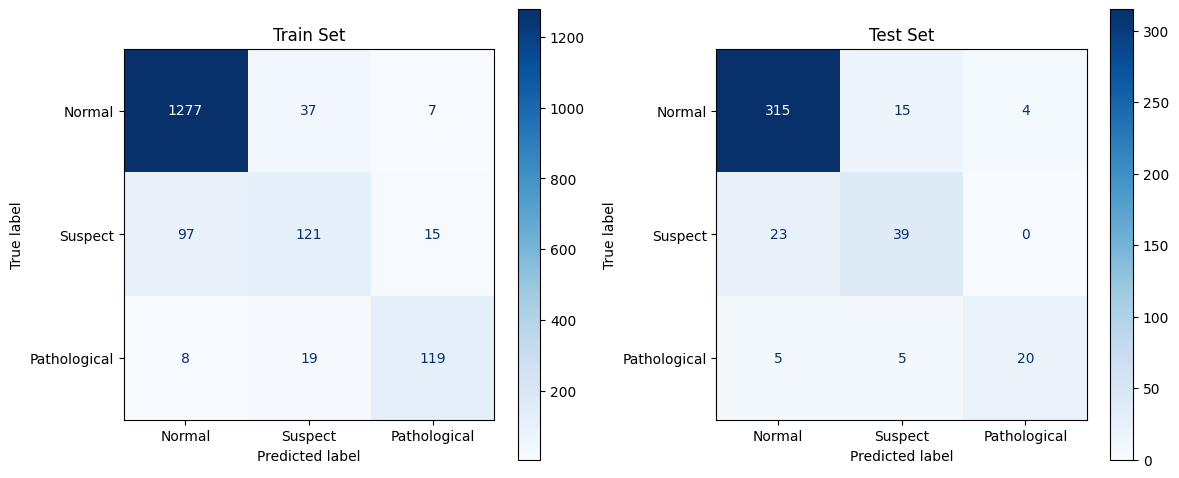

In [ ]:
model5 = LogisticRegression(max_iter=int(1e5), C=10000.0).fit(X_train, y_train)
PrintConfusionMatrix(model5)
fit_pred_report(model5)

The results of this trial confirm that decreasing regularization has no effect on performance, since accuracy, macro F1 and weighted F1-scores have remained consistent both times regularization strength was decreased.

If regularization has no effect on the model's performance, it's usually a sign of underfitting. Since logistic regression is a linear model, this may be a sign that the data is non-linear, and we should therefore move on from logistic regression to a different classifier.

## Nearest Neighbors

Before moving on to the SVC and neural networks, I would like to try a nearest neighbor model. These models "memorize" the training set, and when it's time to predict, they give the answer corresponding to the nearest point in the training data. I feel like this could work pretty well in this case, since fetuses with features similar to those of "pathological" fetusus should be pathological themselves, right? I guess we'll find out.

I started with just 1 neighbor before attempting k-averaging.

### Model 6: Nearest Neighbors Model; k = 1

Train Set  | Accuracy: 0.9988235 | Macro F1-Score: 0.9983111 | Weighted F1-Score: 0.9988214 
Test Set   | Accuracy: 0.9225352 | Macro F1-Score: 0.8550382 | Weighted F1-Score: 0.9231525 


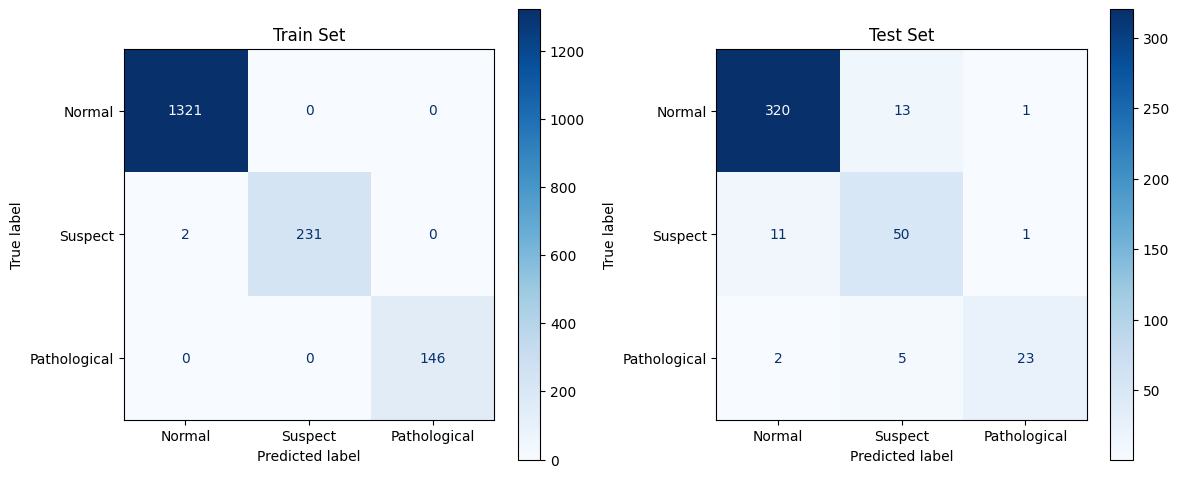

In [ ]:
model6 = neighbors.KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
PrintConfusionMatrix(model6)
fit_pred_report(model6)

I'm really happy with the performance of this model. I'm a couple steps closer to my target testing performance. Training performance was nearly perfect as expected. I'll give k-averaging a try using 2 and then 5 neighbors.

### Models 7 & 8: Nearest Neighbors; k = 2 and 5 respectively

Train Set  | Accuracy: 0.9376471 | Macro F1-Score: 0.8790498 | Weighted F1-Score: 0.9330888 
Test Set   | Accuracy: 0.8943662 | Macro F1-Score: 0.7845600 | Weighted F1-Score: 0.8846537 


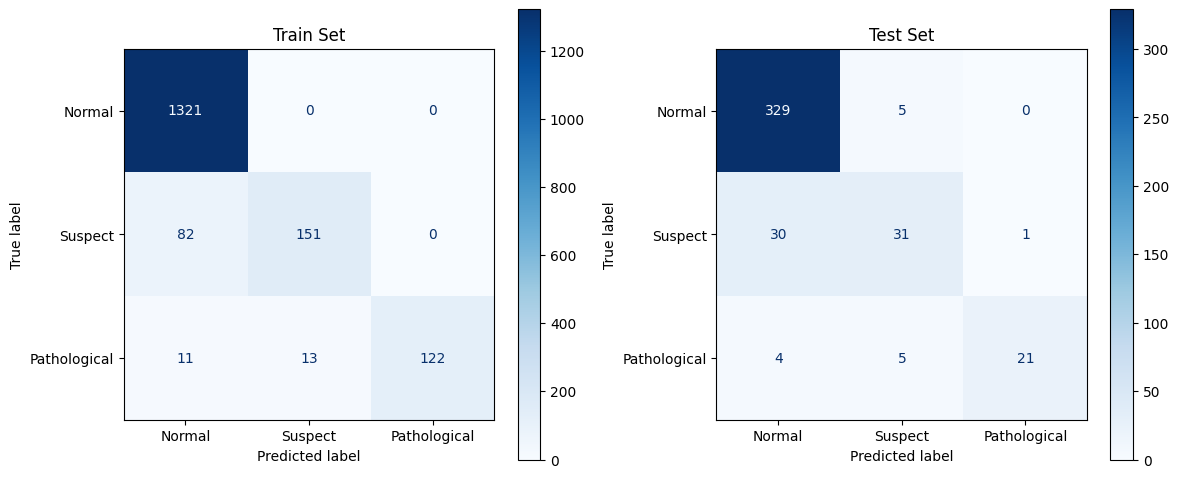

In [ ]:
# K-Nearest Neighbors (KNN), k = 2
model7 = neighbors.KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
PrintConfusionMatrix(model7)
fit_pred_report(model7)

Train Set  | Accuracy: 0.9211765 | Macro F1-Score: 0.8539476 | Weighted F1-Score: 0.9185684 
Test Set   | Accuracy: 0.8967136 | Macro F1-Score: 0.8131613 | Weighted F1-Score: 0.8933952 


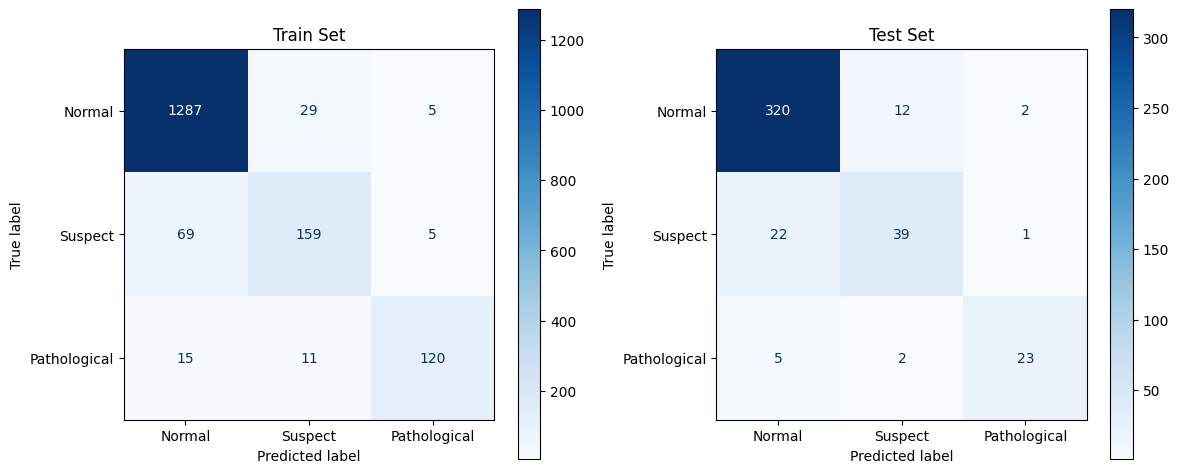

In [ ]:
# KNN, k = 5
model8 = neighbors.KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
PrintConfusionMatrix(model8)
fit_pred_report(model8)

As the number of neighbors increases, testing and training performances decrease. The models still performed better than the ones that used logistic regression, so I'm happy about that. I tried changing other parameters of the k-neighbors classifier (such as weights and algorithm), but none of them had any effect on performance, so I won't document the experimentation here.

So far, the best model is model 6, which is a nearest neighbor model. To understand the progress so far and what's left to do, I'll put the initial, current and target testing performances in a little table.

   | Performance Measure | Baseline | Where We Are | Goal |
|---|-------------|----------|-----------|
| Accuracy | 0.88  | 0.92 | ≥ 0.95 |
| Macro F1-Score | 0.78 | 0.86 | ≥ 0.85 |
| Weighted F1-Score | 0.88 | 0.92 | ≥ 0.95 |

The macro F1-score of model 6 surpassed the target, but my eyes are mostly on accuracy. Let's see if we can reach the target accuracy score.

I'll move on to support vector machines next.

## Support Vector Machines

I'll give each of the three different kernels a try, although I don't expect much from the linear kernel.

### Model 9: SVC with linear kernel

Train Set  | Accuracy: 0.8847059 | Macro F1-Score: 0.7740136 | Weighted F1-Score: 0.8794698 
Test Set   | Accuracy: 0.8802817 | Macro F1-Score: 0.7718013 | Weighted F1-Score: 0.8794817 


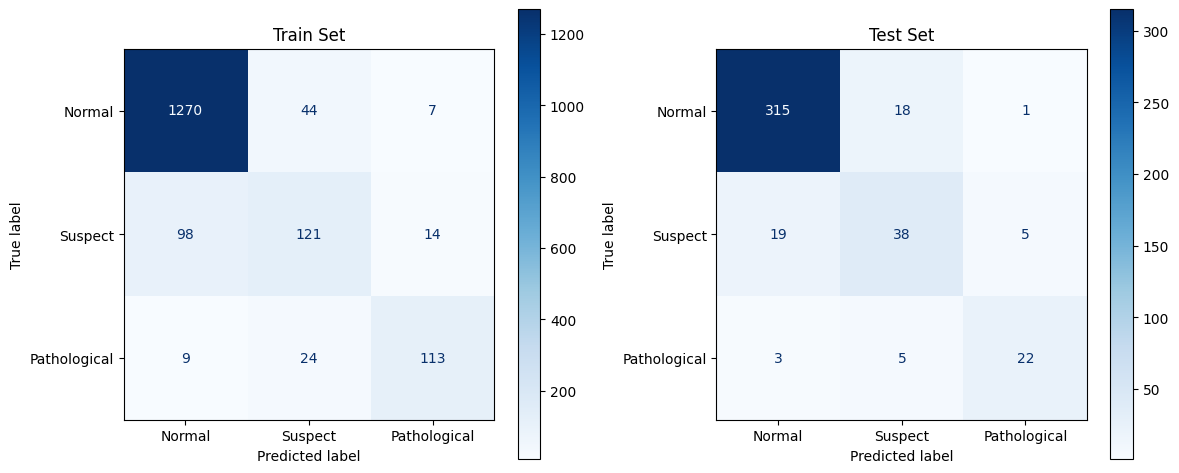

In [ ]:
model9 = SVC(kernel = 'linear', C=1e4, max_iter=int(1e9)).fit(X_train, y_train)
PrintConfusionMatrix(model9)
fit_pred_report(model9)

This took a really long time to run, which I wasn't expecting. The performance is pretty much the same as those of the logistic regression functions, but I didn't expect the linear kernel to do too well, since it's probably rare for data in multiclass classification problems to be linearly separable.

I'll try the polynomial kernel with the default number of degrees (3), as well as 2 and then 4 to see if increasing or decreasing has any significant effect.

### Models 10-12: SVC with polynomial kernel and degrees of 3, 2 and 4 respectively
*Only the confusion matrix for model 10 was printed to save some space.*

Train Set  | Accuracy: 0.9370588 | Macro F1-Score: 0.8951861 | Weighted F1-Score: 0.9355514 
Test Set   | Accuracy: 0.9225352 | Macro F1-Score: 0.8813693 | Weighted F1-Score: 0.9236194 


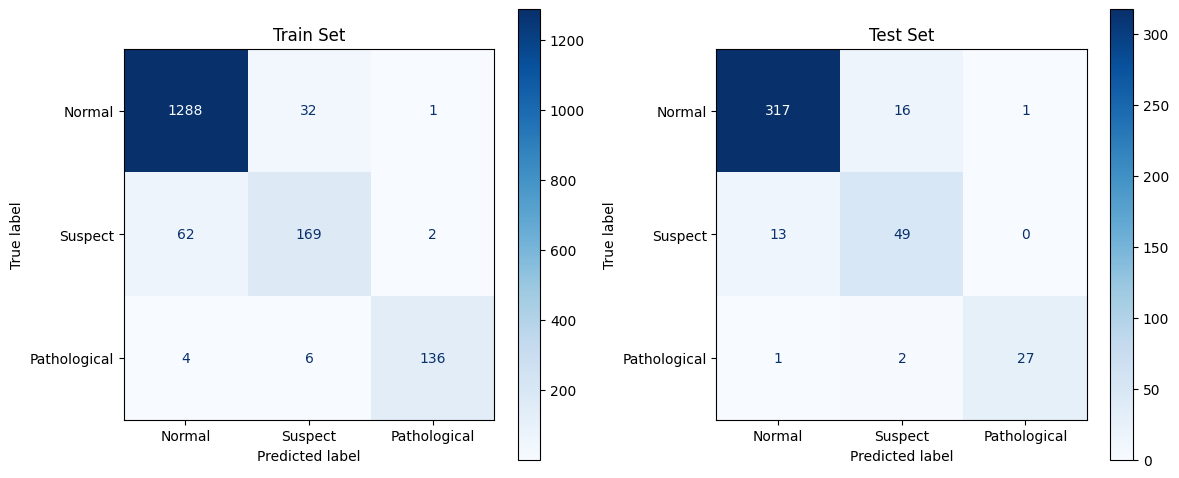

In [ ]:
model10 = SVC(kernel = 'poly', C=1e4, max_iter=int(1e9)).fit(X_train, y_train)
PrintConfusionMatrix(model10)
fit_pred_report(model10)

In [ ]:
model11 = SVC(kernel = 'poly', C=1e4, max_iter=int(1e9), degree = 2).fit(X_train, y_train)
model12 = SVC(kernel = 'poly', C=1e4, max_iter=int(1e9), degree = 4).fit(X_train, y_train)

print('Model 11: Polynomial Kernel; Degree = 2')
fit_pred_report(model11)
print('\n Model 12: Polynomial Kernel; Degree = 4')
fit_pred_report(model12)

Model 11: Polynomial Kernel; Degree = 2
Train Set  | Accuracy: 0.9264706 | Macro F1-Score: 0.8754801 | Weighted F1-Score: 0.9244300 
Test Set   | Accuracy: 0.9084507 | Macro F1-Score: 0.8608689 | Weighted F1-Score: 0.9091877 

 Model 12: Polynomial Kernel; Degree = 4
Train Set  | Accuracy: 0.9452941 | Macro F1-Score: 0.9082196 | Weighted F1-Score: 0.9438583 
Test Set   | Accuracy: 0.9107981 | Macro F1-Score: 0.8618699 | Weighted F1-Score: 0.9115422 


The peak performance for the testing data seems to be that of Model 10, with the degree of 3. Comparing this to the nearest neighbor model (model 6), the accuracy and weighted F1-scores remain the same while the macro F1-score increases slightly from 0.855 to 0.881. I don't think that training accuracy will be meaningful because of how the nearest neighbor model works, so I'll focus on the testing performance to compare models 6 and 10. Although the increase isn't significant, it's still an improvement. I think this model should be the new "one to beat."

| Performance Measure | Baseline | Where We Are | Goal |
|---|-------------|----------|-----------|
| Accuracy | 0.88  | 0.92 | ≥ 0.95 |
| Macro F1-Score | 0.78 | 0.88 | ≥ 0.85 |
| Weighted F1-Score | 0.88 | 0.92 | ≥ 0.95 |

I have some pretty high expectations for the radial basis function since it's ideal for most cases. I'll try the default gamma, and then increase it slightly to 1e2.

### Model 13: SVC with radial basis function (default gamma)

Train Set  | Accuracy: 0.9394118 | Macro F1-Score: 0.8967275 | Weighted F1-Score: 0.9373292 
Test Set   | Accuracy: 0.9037559 | Macro F1-Score: 0.8398193 | Weighted F1-Score: 0.9037559 


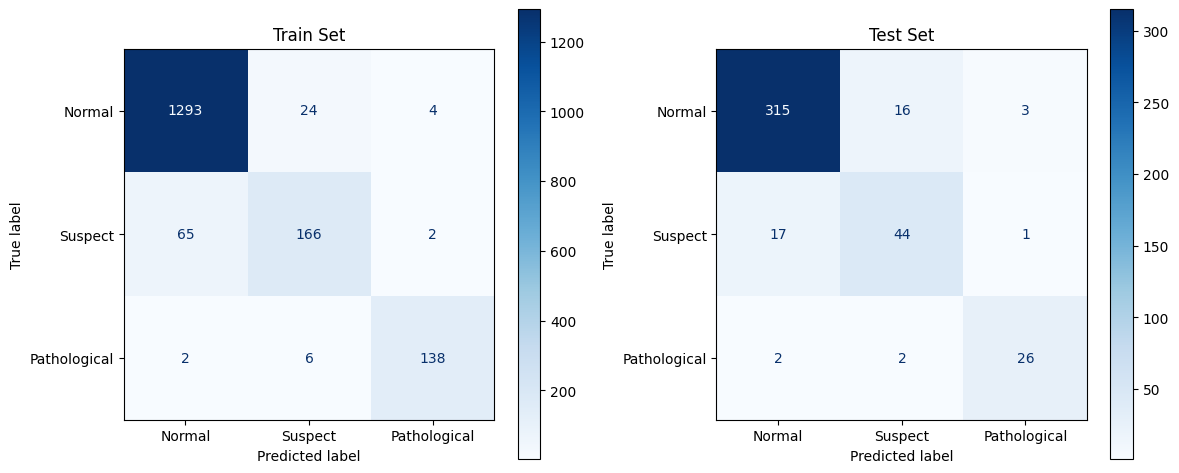

In [ ]:
model13 = SVC(kernel = 'rbf', C=1e4, max_iter=int(1e9)).fit(X_train, y_train)
PrintConfusionMatrix(model13)
fit_pred_report(model13)

This was slightly anticlimatic but I'm still happy with testing accuracy that's ≥ 0.90. I have a feeling that increasing the gamma parameter will cause some serious overfitting, because I have seen this happen before. I'll still give it a shot just to see, and set gamma to 1e2.

### Model 14: SVM with radial basis function (gamma = 1e2)

Train Set  | Accuracy: 0.9988235 | Macro F1-Score: 0.9983111 | Weighted F1-Score: 0.9988214 
Test Set   | Accuracy: 0.7887324 | Macro F1-Score: 0.3145888 | Weighted F1-Score: 0.7000423 


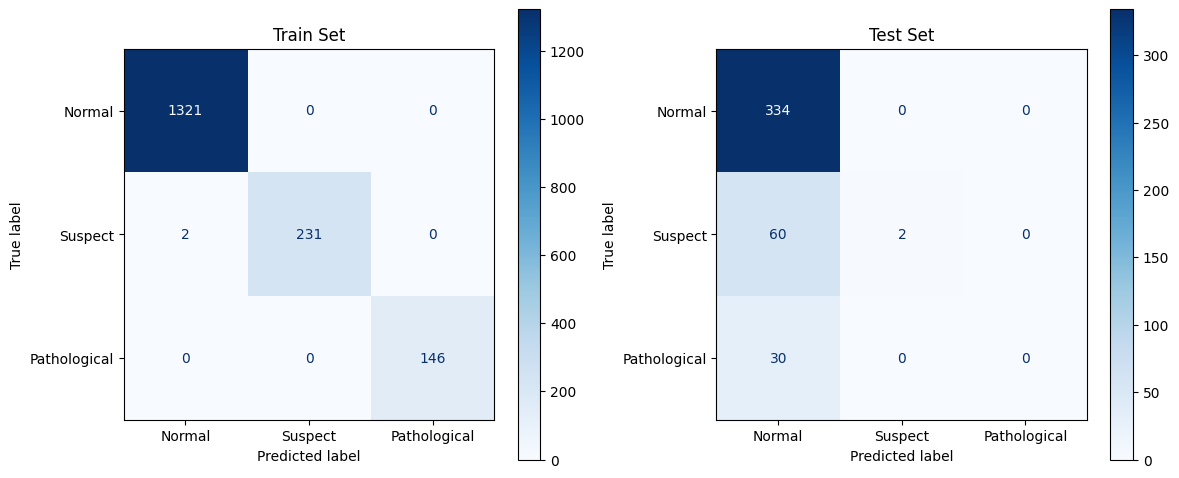

In [ ]:
model14 = SVC(kernel = 'rbf', C=1e4, max_iter=int(1e9), gamma = 1e2).fit(X_train, y_train)
PrintConfusionMatrix(model14)
fit_pred_report(model14)

As expected, there's some criminal overfitting going on here. The training performance is nearly perfect, but the model seemed to have predicted "normal" for every fetus except 2 of them. I can picture the tiny circles the classifier drew around each training point.

At this point, it seems to me like model 10 (SVC with polynomial kernel and degree of 3) is the best that I'll be getting when it comes to SVMs. Moving on from this, the last classifier I want to try is the MLPClassifier.

## Neural Networks
This is the classifier I'm most excited to try, even though I know it'll stress my computer out a little and probably take a while to run. I'll use the lbfgs solver for every model (any time I used a different solver, I got an error message that pointed to my .fit line and said: *'float' object cannot be interpreted as an integer.* I'm assuming that these solvers require the data to be integers, but since mine are floating-point numbers, they don't work).

I'll mostly experiment with the hidden layer sizes, regularization strength, and adjust the maximum number of iterations to allow it to converge. To save some space, I won't document every trial.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Train Set  | Accuracy: 0.9864706 | Macro F1-Score: 0.9745314 | Weighted F1-Score: 0.9864085 
Test Set   | Accuracy: 0.8708920 | Macro F1-Score: 0.7821740 | Weighted F1-Score: 0.8729097 


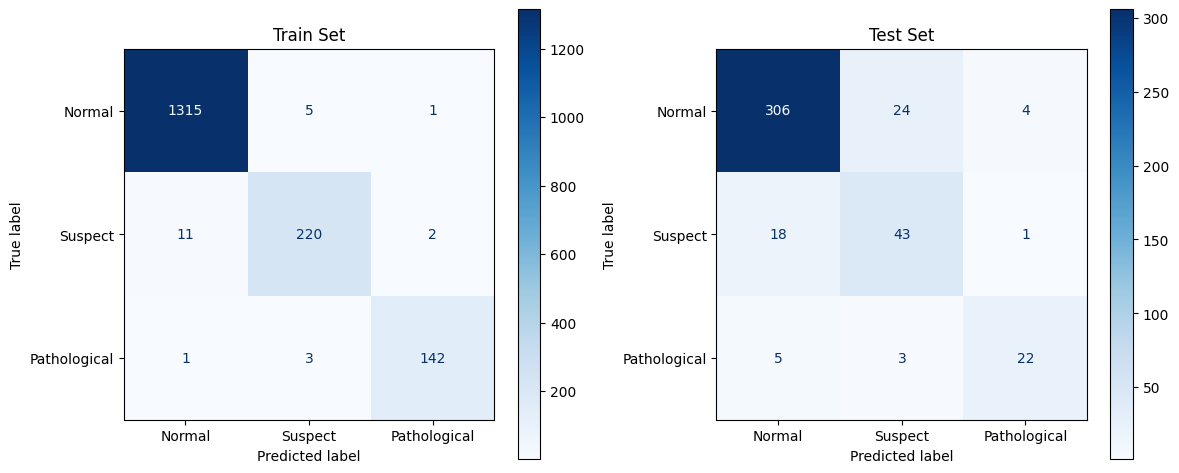

In [ ]:
model15 = MLPClassifier(solver='lbfgs', activation = 'logistic', hidden_layer_sizes=(100, 100), random_state=1, max_iter=int(1e9))
model15.fit(X_train, y_train)
PrintConfusionMatrix(model15)
fit_pred_report(model15)

A lot of the trials took a really long time to run as expected. I did expect to fit a better model with this classifier, which did not happen. I played around with the hidden layer sizes, activation functions, and regularization, but this was ineffective. The best accuracy and weighted F1-scores I achieved were about 0.90 for both.

I still plan to fit individual variables and groups of variables, which I predict will improve the performance and get me past the 0.95 accuracy/weighted F1 mark.

Before moving on to this, I want to fit a decision tree classifier, even though I have not used this kind of classifier before. According to scikit, the goal of decision trees is "to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features."

## Decision Trees

### Model 16: Decision tree classifier with default parameters

Train Set  | Accuracy: 0.9988235 | Macro F1-Score: 0.9983111 | Weighted F1-Score: 0.9988214 
Test Set   | Accuracy: 0.9366197 | Macro F1-Score: 0.9028112 | Weighted F1-Score: 0.9373813 


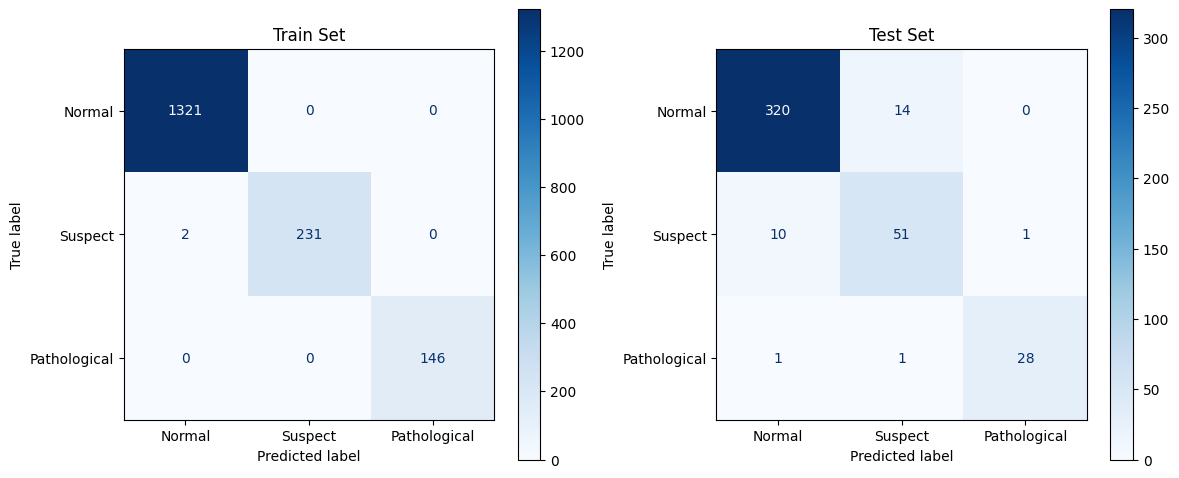

In [ ]:
model16 = DecisionTreeClassifier().fit(X_train, y_train)
PrintConfusionMatrix(model16)
fit_pred_report(model16)

Even without playing with the parameters, this classifier is already doing better than the others. I played around with a few of the parameters and was able to improve performance slightly with the next model.

### Model 17: Decision tree classifier (max_depth = 13)

Train Set  | Accuracy: 0.9947059 | Macro F1-Score: 0.9919492 | Weighted F1-Score: 0.9946895 
Test Set   | Accuracy: 0.9389671 | Macro F1-Score: 0.9024995 | Weighted F1-Score: 0.9396009 


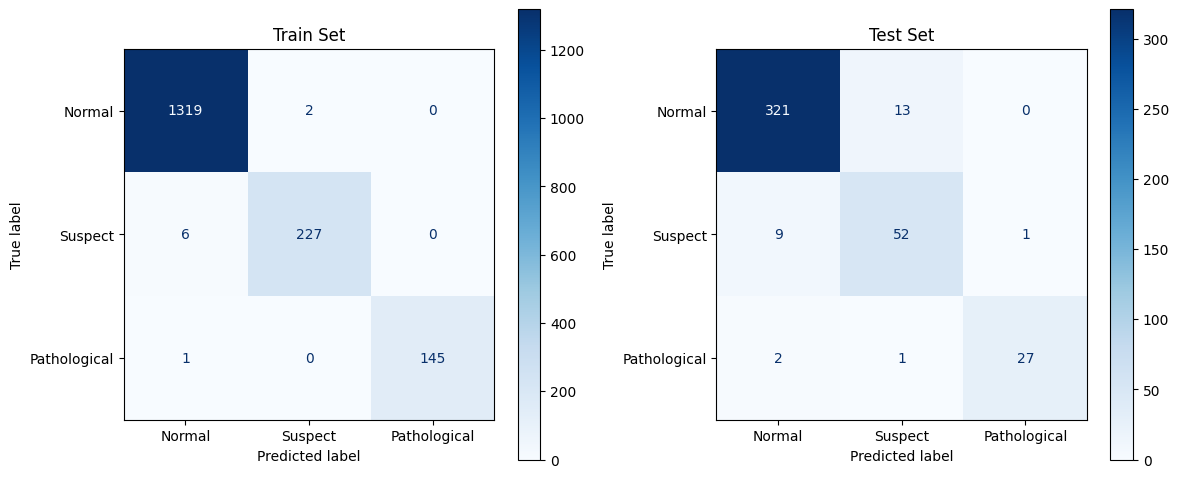

In [ ]:
model17 = DecisionTreeClassifier(random_state=0, max_depth = 13)
model17.fit(X_train, y_train)
PrintConfusionMatrix(model17)
fit_pred_report(model17)

The max_depth parameter is the maximum depth of the tree (as the name suggests). The accuracy seemed to peak when max_depth was around 13 and began lowering back to around 0.93 once the maximum depth reached 16. It plateaued soon after. I'm really happy about the results, and I can even see from the test set confusion matrix that the model is performing better; there are significantly fewer incorrect predictions. I feel better about moving on to experimenting with the variables now.

| Performance Measure | Baseline | Where We Are | Goal |
|---|-------------|----------|-----------|
| Accuracy | 0.88  | 0.939 | ≥ 0.95 |
| Macro F1-Score | 0.78 | 0.902 | ≥ 0.85 |
| Weighted F1-Score | 0.88 | 0.940 | ≥ 0.95 |

The rest of the models will be fit using the decision tree classifier from model 17.

## Taking a look at the variables

This is a list of the input variables in the dataset:
1. Baseline fetal heart rate
2. Number of accelerations per second
3. Number of fetal movements per second
4. Number of uterine contractions per second
5. Number of light decelerations (LDs) per second
6. Number of severe decelerations (SDs) per second
7. Number of prolonged decelerations (PDs) per second
8. Percentage of time with abnormal short term variability
9. Mean value of short term variability
10. Percentage of time with abnormal long term variability
11. Mean value of long term variability
12. Width of the histogram made using all values from a record
13. Histogram minimum value
14. Histogram maximum value
15. Number of peaks in the exam histogram
16. Number of zeroes in the exam histogram
17. Histogram mode
18. Histogram mean
19. Histogram median
20. Histogram variance
21. Histogram tendency (not too sure what this variable is)

I looked up some information about reading CTGs to clarify what some of the variables mean. Decelerations are "abrupt decreases in baseline fetal heart rate of greater than 15bpm for greater than 15 seconds" (geekymedics.com). Accelerations are the opposite: "abrupt increases in baseline fetal heart rate of greater than 15bpm for greater than 15 seconds" (geekymedics.com). Variability refers to "the variation of fetal heart rate from one beat to the next" (geekymedics.com).

At first glance, I already kind of see some categories forming. The first is variables 1-7, the second from 8-11 (related to variability), and the last from 12-21 (related to the histogram). They're not very even in size, but I'm not concerned about this. I'll start by testing how these three categories perform on their own and see how it goes. I don't have names for them, so I'll call them Categories 1, 2 and 3.

### Category 1 Variables (1-7)


Now that we know what model we are using (model 17), we can use a function to do all of the work: the train-test split, fitting the classifier, making predicitions, and printing the confusion matric and performance report. We only need to change the X and y data going into the function.


Train Set  | Accuracy: 0.9617647 | Macro F1-Score: 0.9304820 | Weighted F1-Score: 0.9607262 
Test Set   | Accuracy: 0.8732394 | Macro F1-Score: 0.7649357 | Weighted F1-Score: 0.8702665 


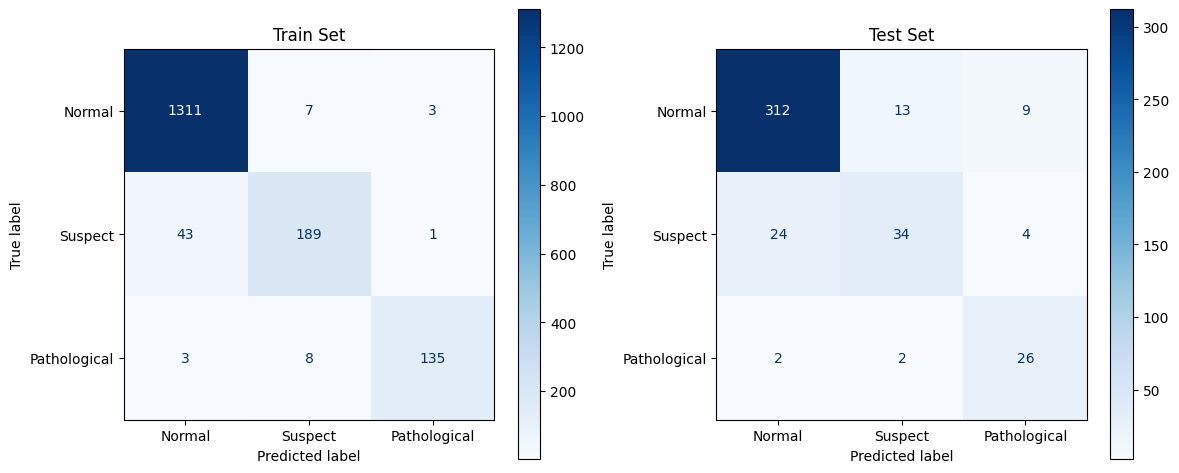

In [ ]:
X = df1.iloc[:, :7]
y = df1.iloc[:, -1]

# Function to perform train-test split, fit classifier, predict, print the confusion matrix and report performance
def sfpr(X, y):

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    # Fit model 17
    model = DecisionTreeClassifier(random_state=0, max_depth = 13).fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Print the performance report
    report(y_train, y_train_pred, 'Train Set')
    report(y_test, y_test_pred, 'Test Set')

    # Plot the confusion matrix
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
    ConfusionMatrixDisplay.from_estimator(model, X_train, y_train,
                                 display_labels=['Normal', 'Suspect', 'Pathological'],
                                 cmap=plt.cm.Blues,
                                 ax=ax1)
    ax1.set_title('Train Set');

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,
                                 display_labels=['Normal', 'Suspect', 'Pathological'],
                                 cmap=plt.cm.Blues,
                                 ax=ax2)
    ax2.set_title('Test Set')


    return plt.tight_layout()

sfpr(X, y)

### Category 2 Variables (8-11)

Train Set  | Accuracy: 0.9923529 | Macro F1-Score: 0.9876425 | Weighted F1-Score: 0.9923044 
Test Set   | Accuracy: 0.8755869 | Macro F1-Score: 0.7678476 | Weighted F1-Score: 0.8767127 


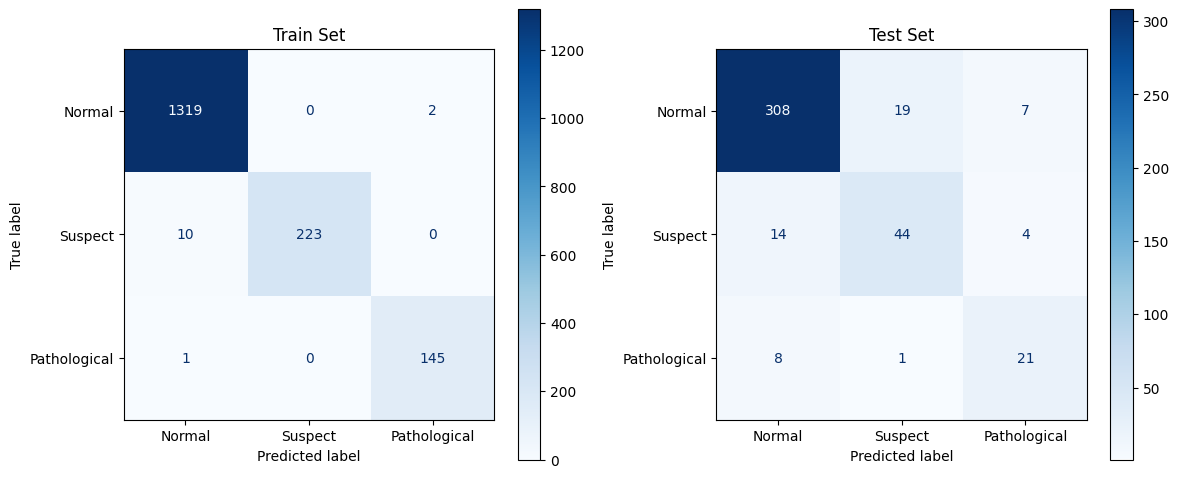

In [ ]:
X = df1.iloc[:, 7:11]
sfpr(X, y)

### Category 3 Variables (12-21)

Train Set  | Accuracy: 0.9858824 | Macro F1-Score: 0.9749239 | Weighted F1-Score: 0.9857122 
Test Set   | Accuracy: 0.8239437 | Macro F1-Score: 0.6855790 | Weighted F1-Score: 0.8208346 


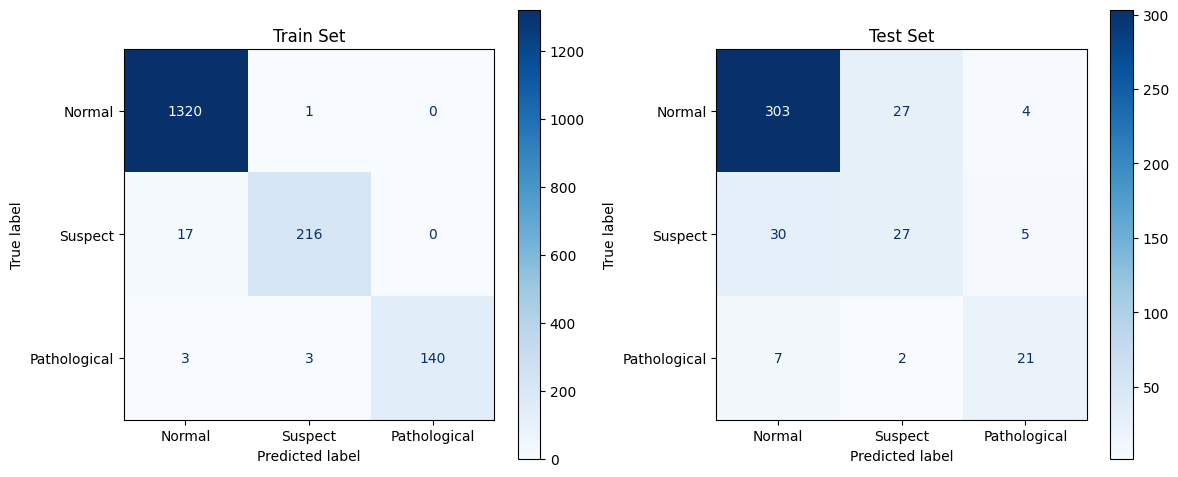

In [ ]:
X = df1.iloc[:, 11:-1]
sfpr(X, y)

It looks like fitting categories of variables causes some overfitting to occur. Training performance is great while testing could use a lot of work. Category 3 performed significantly worse than the first two; perhaps some of the histogram-related variables aren't needed. I'll fit the top two performing categories together.

### Model 18: Category 1 and 2 variables

Train Set  | Accuracy: 0.9970588 | Macro F1-Score: 0.9958000 | Weighted F1-Score: 0.9970614 
Test Set   | Accuracy: 0.9131455 | Macro F1-Score: 0.8676725 | Weighted F1-Score: 0.9154444 


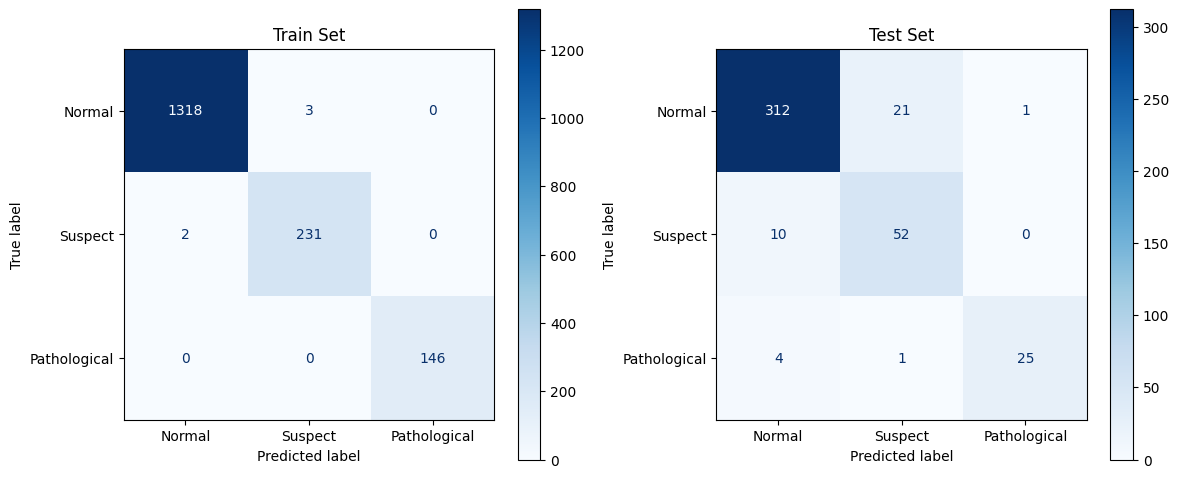

In [ ]:
X = df1.iloc[:, :11]
sfpr(X, y)

These categories perform better together than individually, as expected, but they don't perform as well together as all of the variables did.

Since category 3 variables performed poorly despite having the most variables, I decided to test each of them individually.
Removal of the following two variables from category 3 *improved* the testing performance of the category 3 model from 0.82 to 0.85:
1. Histogram Width
2. Histogram Min

These might be the pesky variables holding us back. The next model will use every variable except these two.

### Model 19: All variables except Histogram Width and Histogram Min

Train Set  | Accuracy: 0.9964706 | Macro F1-Score: 0.9944990 | Weighted F1-Score: 0.9964627 
Test Set   | Accuracy: 0.9460094 | Macro F1-Score: 0.9152329 | Weighted F1-Score: 0.9466454 


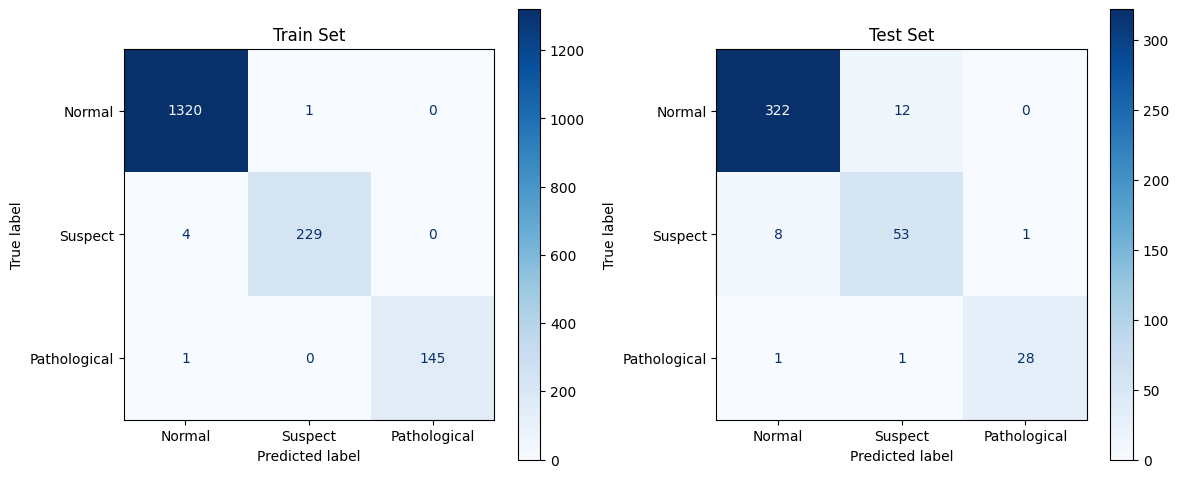

In [ ]:
X = df1.drop(["Fetal Health", "Histogram Width", "Histogram Min"], axis = 1)
sfpr(X, y)

With some further experimenting by removing variables, I was able to improve performance even a little more. Interestingly, removing these variables individually did not do much, but removing them together improved performance slightly. The variables that were removed are:
1. Prolonged Decelerations
2. Histogram Max
3. Histogram Tendency

This is the outcome when these variables are removed from the input of model 19.

### Model 20: All variables except: Histogram Width, Histogram Min, Prolonged Decelerations, Histogram Max, and Histogram Tendency

Train Set  | Accuracy: 0.9905882 | Macro F1-Score: 0.9845533 | Weighted F1-Score: 0.9905069 
Test Set   | Accuracy: 0.9483568 | Macro F1-Score: 0.9150888 | Weighted F1-Score: 0.9481238 


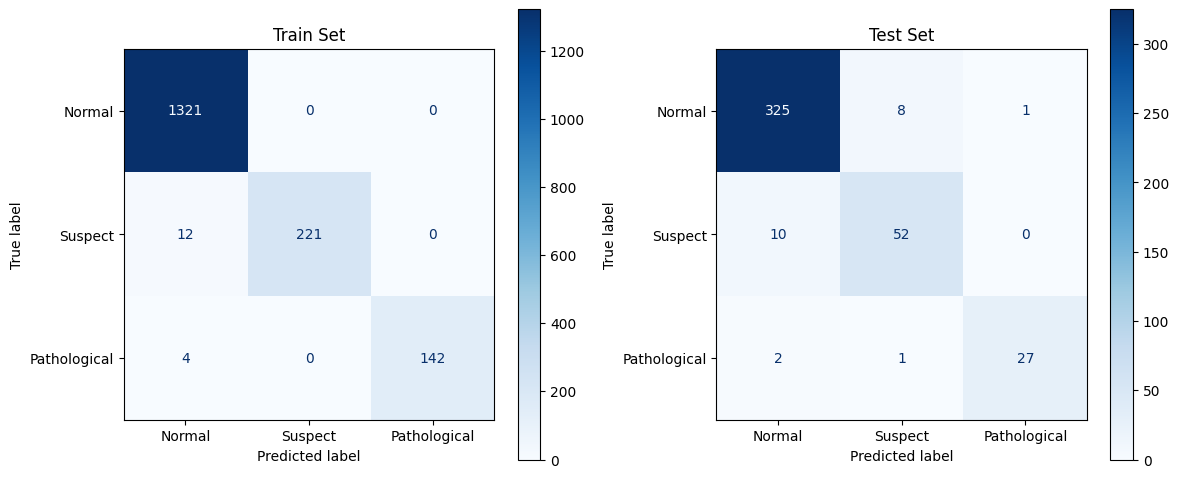

In [ ]:
X = df1.drop(["Fetal Health", "Histogram Width", "Histogram Min", "Prolonged Decelerations", "Histogram Max", "Histogram Tendency"], axis = 1)
sfpr(X, y)

Evidently, a lot of the "histogram" variables weren't very useful. The performance of the last couple of models suggests that they had adverse effects on performance. I can't say I'm surprised that removing these variables improved performance, because I didn't find much information about histograms relating to CTGs, so I was questioning what those variables were about. On the other hand, I read that characteristics like baseline heart rate, uterine contractions, variability, accelerations and decelerations are actually the main characteristics that physicians look out for when interpreting CTGs and detremining fetal health states. Thus, I'm not surprised that these were the most useful variables, while the histogram ones were less useful.

Even though I would like to see a 0.95 accuracy score, I'm satisfied with the latest model. The results are very close to our goal, but I continued with subsets of variables and was unable to improve the model any further.

For a little more insight into the performance of the final model, I'll print a classification report, and then go ahead and conclude.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
clf = DecisionTreeClassifier(random_state=0, max_depth = 13).fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print("Final Model: Testing Classification Report \n\n", classification_report(y_test, y_test_pred, target_names=['Normal', 'Suspect', 'Pathological']))

Final Model: Testing Classification Report 

               precision    recall  f1-score   support

      Normal       0.96      0.97      0.97       334
     Suspect       0.85      0.84      0.85        62
Pathological       0.96      0.90      0.93        30

    accuracy                           0.95       426
   macro avg       0.93      0.90      0.92       426
weighted avg       0.95      0.95      0.95       426



## Conclusion
I wasn't able to reach my target accuracy, but I came very close. I'm pretty confident that if I continued playing around with the classifier parameters and the other features of the current model, I would be able to cross the line to 0.95.

My final model of choice is **model 20**. It uses a decision tree classifier with a maximum depth of 13, and is fit using 16 out of the 21 input features.

| Performance Measure | Baseline | Final Model | Goal |
|---|-------------|----------|-----------|
| Accuracy | 0.88  | 0.948 | ≥ 0.95 |
| Macro F1-Score | 0.78 | 0.915 | ≥ 0.85 |
| Weighted F1-Score | 0.88 | 0.948 | ≥ 0.95 |

This is a summary of the top 3 performing models, just to show how performance progressed over time.

| Performance Measure | Baseline | Model 10 | Model 17 | Model 20 | Goal |
|---|-------------|----------|-----------|--------|-------|
| Accuracy | 0.88  | 0.923 | 0.939 | 0.948 | ≥ 0.95 |
| Macro F1-Score | 0.78 | 0.881 | 0.902 | 0.915 | ≥ 0.85 |
| Weighted F1-Score | 0.88 | 0.923 | 0.940 | 0.948 | ≥ 0.95 |

The variables that were most useful, as expected, were those in categories 1 and 2 (aside from variable 7: Prolonged Deceleration). When I was reading about CTGs, I found that the main characteristics that are assessed when interpreting them are: contractions, baseline rate, variability, accelerations and decelerations (the others are characteristics that are assessed are risk -- referring to whether the pregnancy is low or high risk -- and overall impression, which are not accounted for in this dataset). These characteristics are mostly in categories 1 and 2. I couldn't find much information about histograms related to CTGs, so I'm not surprised that some of the histogram variables were the least useful.

# Sources
1. [Fetal Health Prediction Dataset]( https://www.kaggle.com/andrewmvd/fetal-health-classification)
2. [Printing 3x3 confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator)
3. [Measuring performance for multiclass classification problems](https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826)
4. [Logistic Regression classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
5. [k-Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
6. [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
7. [MLP Classifier](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification)
8. **Decision Tree:**
    - https://scikit-learn.org/stable/modules/tree.html#
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
9. [Reading a CTG](https://geekymedics.com/how-to-read-a-ctg/#:~:text=CTG%3A%20Accelerations-,Decelerations,for%20greater%20than%2015%20seconds.)